# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [85]:

%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [86]:
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [87]:
pima.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [88]:
pima.shape

(768, 9)

In [89]:
pima.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [90]:
a = ['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
for i in a:
    pima.loc[pima[i] == 0, i] = pima[pima[i] != 0][i].median()

In [91]:
pima.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54.0,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [92]:
pima.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

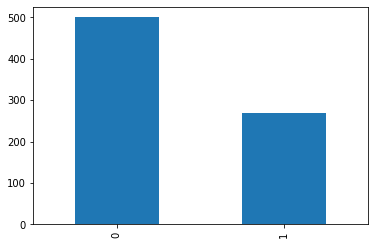

In [93]:
pima['class'].value_counts().plot(kind='bar')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [94]:
pima.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


E:\anaconda distribution\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\anaconda distribution\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


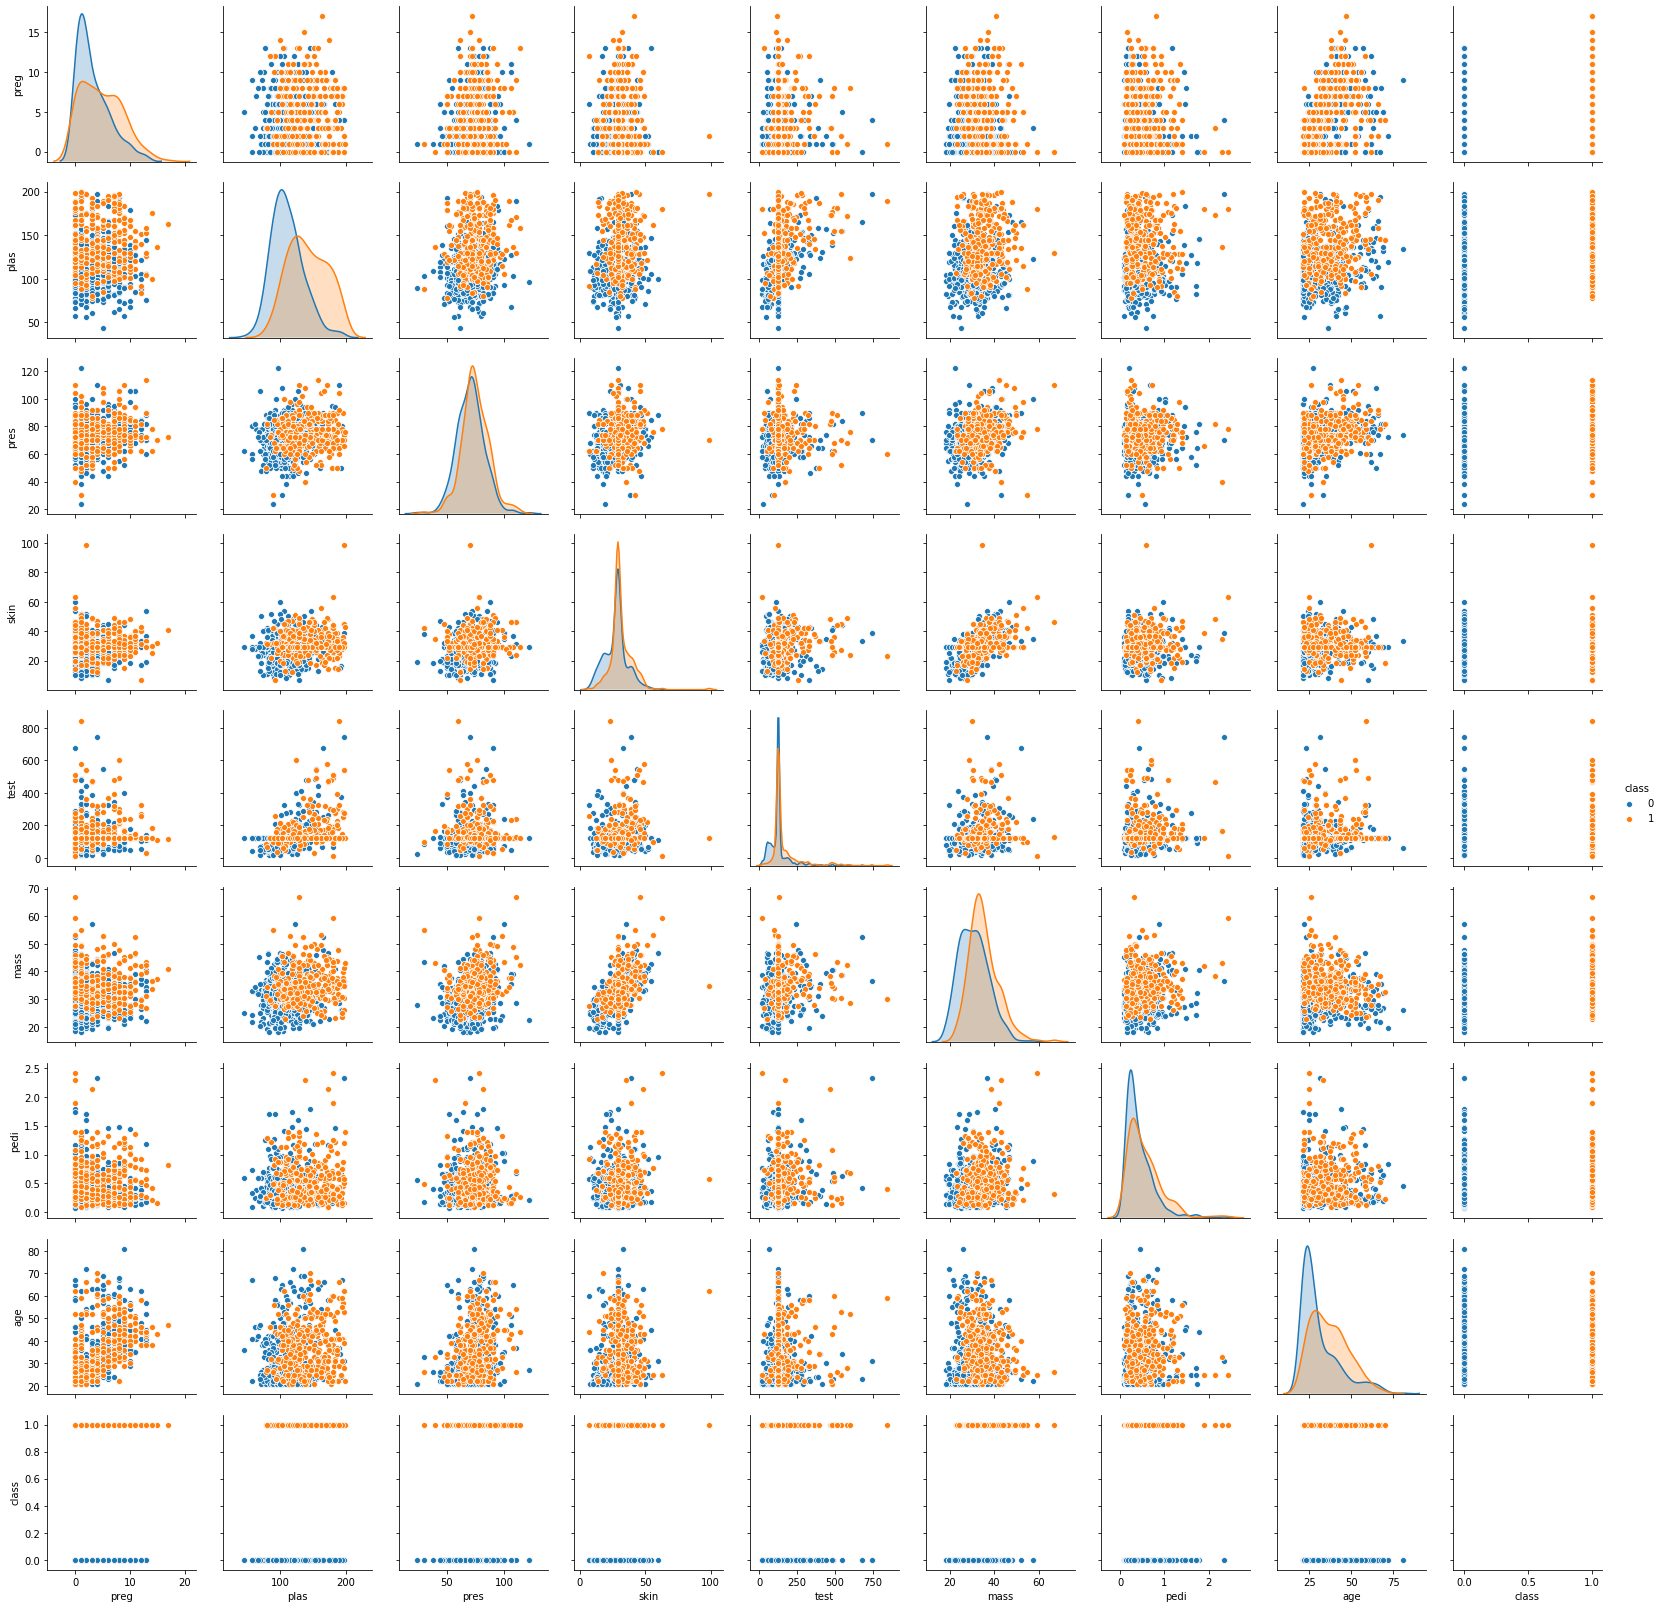

In [95]:
# Pairplot using sns

sns.pairplot(pima, hue='class' , diag_kind = 'kde')

as per pairplot observation:
1. in preg plot data is not properly classified as peak of graph overlapping this kind of behaviour observed in all features.
2. data for all the attributes are skewed, especially for the variable "test"except skin attributes all are normally distributed.
3. There is no obvious relationship between age and onset of diabetes.

Using the plot - infer the relationship between different variables

In [96]:
pima.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


as per correlation matrix only plazma attribute is highy correlated with the class

here is no obvious relationship between pedi function & onset diabetics

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
array = pima.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [98]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)


# Q10 Print the accuracy of the model & print the confusion matrix 

In [99]:
print('Traning accuracy-',dt_model.score(X_train , y_train))
print('Testing accuracy-',dt_model.score(X_test , y_test))

from sklearn import metrics
print('confusion matrix-',metrics.confusion_matrix(y_test,y_predict))

Traning accuracy- 1.0
Testing accuracy- 0.7229437229437229
confusion matrix- [[119  33]
 [ 31  48]]


Print the feature importance of the decision model - Optional

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [100]:
from sklearn.ensemble import RandomForestClassifier

,Scores,n_estimators
0,0.792208,50
1,0.779221,75
2,0.757576,100
3,0.779221,125
4,0.774892,150
5,0.774892,175
6,0.783550,200
7,0.792208,225
8,0.774892,250
9,0.779221,275


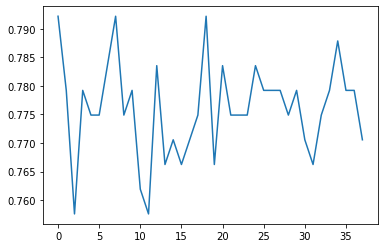

In [101]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train, y_train)
    Test_y_predict_rfcl = Test_rfcl.predict(X_test)
    scores = Test_rfcl.score(X_test, y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
plt.plot(Test_reg_scores)

pd.concat([pd.DataFrame(Test_reg_scores, columns = ['Scores']),
               pd.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

In [112]:
rfcl = RandomForestClassifier(n_estimators = 50 , random_state=RandomState)
rfcl = rfcl.fit(X_train, y_train)
Y_predict_rfcl = rfcl.predict(X_test)
print('Traning score-',rfcl.score(X_train , y_train))
print('Testing score-',rfcl.score(X_test, y_test))

Traning score- 1.0
Testing score- 0.7748917748917749


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [103]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = abcl.fit(X_train, y_train)

In [104]:
print('Traning score-',abcl.score(X_train , y_train))
print('Testing score-',abcl.score(X_test, y_test))

Traning score- 1.0
Testing score- 0.7489177489177489


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [105]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100)

bgcl = bgcl.fit(X_train, y_train)

In [106]:
print('Traning score-',bgcl.score(X_train , y_train))
print('Testing score-',bgcl.score(X_test, y_test))

Traning score- 1.0
Testing score- 0.7792207792207793


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.1)
gbcl = gbcl.fit(X_train, y_train)

In [108]:
print('Traning score-',gbcl.score(X_train , y_train))
print('Testing score-',gbcl.score(X_test, y_test))

Traning score- 0.8975791433891993
Testing score- 0.7792207792207793


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
estimators = [('rf', RandomForestClassifier(n_estimators=75)),('logistic', LogisticRegression()), ('Naive', MultinomialNB())]
stackingclf = VotingClassifier(estimators=estimators, voting='soft')
stackingclf.fit(X_train,y_train)

E:\anaconda distribution\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=75,
                                                     n_jobs=None,
           

In [110]:
print('Traning score-',stackingclf.score(X_train , y_train))
print('Testing score-',stackingclf.score(X_test, y_test))

Traning score- 0.8268156424581006
Testing score- 0.7619047619047619
